# 훈령과정 : R.파이썬 기반 빅데이터 분석 전문가 양성과정
## 교과목 평가 : 분석용 데이터 구축
## 성명 : 김 홍 교
## 점수 :

### 타이타닉 생존자 예측모델 개발
### Q. 타이타닉 생존자 예측모델 개발을 위한 분석용 데이터 셋을 작성하세요.
#### 데이터 :
#### 제공 데이터 파일 : titanic3.csv
#### 훈련/검증용 데이터 : 평가 데이터 = 8 : 2
#### 훈련/검증용 데이터로 모델 학습 및 검증하고 평가 데이터는 최종 평가에만 사용
#### 모델 개발 방법 : 인공신경망
#### 데이터 전처리 및 탐색적 분석을 통하여 파생변수 최소 1개 이상 개발
#### 알고리즘은 최소한 3개 이상 적용(Decision Tree, Random Forest, Logistic Regression은 필수)
#### 훈련 및 평가 방법 : 
#### GridSearchCV API를 활용하여 교차검증 및 최적 하이퍼파라미터 찾아서 학습 및 검증 수행
#### 결과물 제출 : 이메일


## import

In [181]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split #연습용 데이터랑 학습 데이터랑 분리
from sklearn.datasets import load_breast_cancer #데이터셋 불러오기
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.tree import DecisionTreeClassifier #의사결정나무모델분류
from sklearn import tree #의사결정나무모델
import matplotlib.pyplot as plt #그림그리기
%matplotlib inline
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# LogisticRegression
from sklearn.linear_model import LogisticRegression
#인공신경망 준비
from sklearn.neural_network import MLPClassifier #mlp분류
#GridSearchCV 교차검증 하이퍼파라미터
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix,f1_score

# retrieve data

In [182]:
df=pd.read_csv('titanic3.csv')
display(df.head(15))
# 80%의 데이터를 뽑아 나머지 20%의 데이터를 예측해보는 것
# pclass : 선실, survived : 생존여부, name : 이름, sex:성별, age : 나이, sibsp : 동반형제 배우자, parch : 동반부모 자식, ticket : 티켓의 고유 넘버 fare : 요금
# carbin : 객실번호, embarked : 승선항, boat : 구명보트, body : 몸식별번호, home/dest : 출발지/목적지
# 중복된 정보 : X
# 필요한 정보 : survived, pclass, sex, age, boat, sibsp, parch
# null처리 columns : age, boat
# 가공할 columns : sex, age

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


# Analysis

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [184]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# correlation
## SurvivalRate fuc

In [185]:
def SurvivalRate(a,b):
    s = df[[a,'survived']].loc[(df['survived']==1)&(df[a]==b)].count()[0]
    d = df[[a,'survived']].loc[(df['survived']==0)&(df[a]==b)].count()[0]
    SurvivalRate=s/(s+d)
    return SurvivalRate

## SurvivalRate by pclass

In [186]:
print(SurvivalRate('pclass',1))
print(SurvivalRate('pclass',2))
print(SurvivalRate('pclass',3))

0.6191950464396285
0.4296028880866426
0.2552891396332863


## SurvivalRate by sex

In [187]:
print(SurvivalRate('sex','female'))
print(SurvivalRate('sex','male'))

0.7274678111587983
0.19098457888493475


## SurvivalRate by age

In [188]:
df['age']=df['age'].astype('float')
df['age'].max()
display(df['age'])

count, bin_dividers = np.histogram(df['age'], bins=[0,10,20,30,40,50,60,70,81])
print(bin_dividers)
print(count)

bin_names = ['5','15','25','35','45','55','65','75']

df['age_bin'] = pd.cut(x=df['age'],bins=bin_dividers,labels=bin_names,include_lowest=True)


display(df[['age','age_bin']].head(10))

df[['age_bin','survived']]

0       29.00
1        0.92
2        2.00
3       30.00
4       25.00
        ...  
1304    14.50
1305      NaN
1306    26.50
1307    27.00
1308    29.00
Name: age, Length: 1309, dtype: float64

[ 0 10 20 30 40 50 60 70 81]
[ 82 143 344 232 135  70  32   8]


,age,age_bin
0,29.00,25
1,0.92,5
2,2.00,5
3,30.00,25
4,25.00,25
5,48.00,45
6,63.00,65
7,39.00,35
8,53.00,55
9,71.00,75


,age_bin,survived
0,25,1
1,5,1
2,5,0
3,25,0
4,25,0
...,...,...
1304,15,0
1305,NaN,0
1306,25,0
1307,25,0


In [189]:
# def SurvivalRatePrint(column):
#     for i in df[column]
    

print(SurvivalRate('age_bin','5'))
print(SurvivalRate('age_bin','15'))
print(SurvivalRate('age_bin','25'))
print(SurvivalRate('age_bin','35'))
print(SurvivalRate('age_bin','45'))
print(SurvivalRate('age_bin','55'))
print(SurvivalRate('age_bin','65'))
print(SurvivalRate('age_bin','75'))
print(SurvivalRate('age_bin','85'))

0.5813953488372093
0.3950617283950617
0.37119113573407203
0.4238095238095238
0.3939393939393939
0.4838709677419355
0.2222222222222222
0.3333333333333333
nan


## SurvivalRate by sibsp

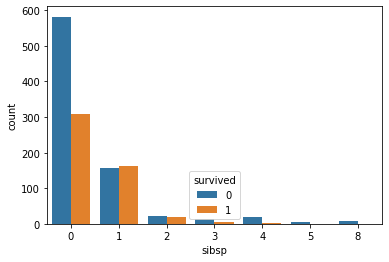

In [190]:
f_plot=sns.countplot(x='sibsp',hue='survived', data=df) # sibsp당 생존률을 계산하여 변환 예정

In [191]:
print(SurvivalRate('sibsp',0))
print(SurvivalRate('sibsp',1))
print(SurvivalRate('sibsp',2))
print(SurvivalRate('sibsp',3))
print(SurvivalRate('sibsp',4))
print(SurvivalRate('sibsp',5))
print(SurvivalRate('sibsp',8))

0.3468013468013468
0.5109717868338558
0.4523809523809524
0.3
0.13636363636363635
0.0
0.0


## SurvivalRate by parch

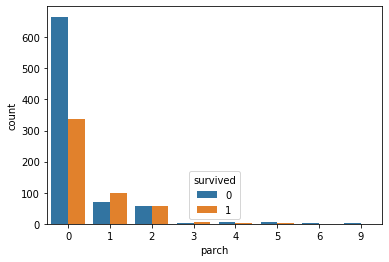

In [192]:
f_plot=sns.countplot(x='parch',hue='survived', data=df) #parch당 생존률을 계산하여 반영할 예정

In [193]:
print(SurvivalRate('parch',0))
print(SurvivalRate('parch',1))
print(SurvivalRate('parch',2))
print(SurvivalRate('parch',3))
print(SurvivalRate('parch',4))
print(SurvivalRate('parch',5))
print(SurvivalRate('parch',6))
print(SurvivalRate('parch',9))

0.33532934131736525
0.5882352941176471
0.504424778761062
0.625
0.16666666666666666
0.16666666666666666
0.0
0.0


## SurvivalRate by fare

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64

[  0.          83.33333333 166.66666667 250.        ]
[1206   64   21]


,fare,fare_bin
0,211.3375,expensive
1,151.5500,middle
2,151.5500,middle
3,151.5500,middle
4,151.5500,middle
5,26.5500,cheap
6,77.9583,cheap
7,0.0000,cheap
8,51.4792,cheap
9,49.5042,cheap


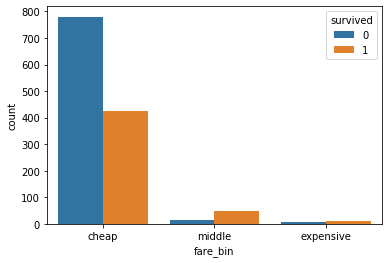

In [194]:
df['fare']=df['fare'].astype('float')
display(df['fare'])
# np.histogram 함수로 3개의 bin으로 나눈는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['fare'], range=[0,250], bins=3)
print(bin_dividers)
print(count)

#3개의 bin에 이름 지정
bin_names = ['cheap','middle','expensive']

#pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['fare_bin'] = pd.cut(x=df['fare'],bins=bin_dividers,labels=bin_names,include_lowest=True)

#horsepower열, hp_bin열의 첫 15행 출력
display(df[['fare','fare_bin']].head(10))

df[['fare_bin','survived']]

f_plot=sns.countplot(x='fare_bin',hue='survived', data=df)

In [195]:
print(SurvivalRate('fare_bin','expensive'))
print(SurvivalRate('fare_bin','middle'))
print(SurvivalRate('fare_bin','cheap'))

0.5714285714285714
0.75
0.35323383084577115


## SurvivalRate by pclass

In [196]:
print(SurvivalRate('pclass',1))
print(SurvivalRate('pclass',2))
print(SurvivalRate('pclass',3))

0.6191950464396285
0.4296028880866426
0.2552891396332863


## SurvivalRate by cabin

In [197]:
df['cabin'].isnull().sum() #null값이 많아서 무의미한 데이터로 취급

1014

## SurvivalRate by boat

In [198]:
df['boat'][df['boat'].notnull()]=1
df['boat'].fillna(0,inplace=True)
display(df['boat'].value_counts())

0    823
1    486
Name: boat, dtype: int64

In [199]:
print(SurvivalRate('boat',0))
print(SurvivalRate('boat',1))

0.027946537059538274
0.9814814814814815


## Not analyzed data
### name : 이름과 생존은 관계가 없다고 판단 
### ticket : 티켓의 이름과 생존은 관계가 없다고 판단
### embarked : 출발지와 생존은 관계가 없다고 판단
### body : 데이터의 중 빠진 데이터가 많고 생존에 큰 영향을 줄 수 없다고 판단.
### home.dest : 집과 도착지는 생존과 관계가 없다고 판단

# meaningful data

In [200]:
meaningful_df=df[['survived', 'pclass', 'sex', 'age_bin', 'boat', 'sibsp', 'parch']]
display(meaningful_df)

,survived,pclass,sex,age_bin,boat,sibsp,parch
0,1,1,female,25,1,0,0
1,1,1,male,5,1,1,2
2,0,1,female,5,0,1,2
3,0,1,male,25,0,1,2
4,0,1,female,25,0,1,2
...,...,...,...,...,...,...,...
1304,0,3,female,15,0,1,0
1305,0,3,female,NaN,0,1,0
1306,0,3,male,25,0,0,0
1307,0,3,male,25,0,0,0


# Null remove process(Age)

In [201]:
meaningful_df.isnull().sum()  #age

survived      0
pclass        0
sex           0
age_bin     263
boat          0
sibsp         0
parch         0
dtype: int64

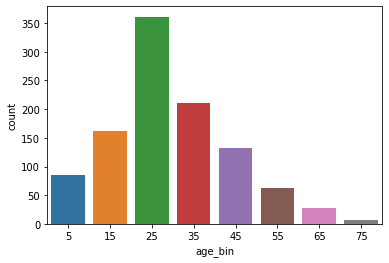

In [202]:
f_plot=sns.countplot(x='age_bin', data=df)

In [203]:
meaningful_df['age_bin'].fillna(method='pad',inplace=True)
meaningful_df['age_bin'].value_counts()

25    457
35    271
15    202
45    175
5      94
55     68
65     35
75      7
Name: age_bin, dtype: int64

# Manufacturing

In [204]:
meaningful_df=meaningful_df.replace('male',1)
meaningful_df=meaningful_df.replace('female',0)
display(meaningful_df)

,survived,pclass,sex,age_bin,boat,sibsp,parch
0,1,1,0,25,1,0,0
1,1,1,1,5,1,1,2
2,0,1,0,5,0,1,2
3,0,1,1,25,0,1,2
4,0,1,0,25,0,1,2
...,...,...,...,...,...,...,...
1304,0,3,0,15,0,1,0
1305,0,3,0,15,0,1,0
1306,0,3,1,25,0,0,0
1307,0,3,1,25,0,0,0


## Target Data

In [205]:
data=['pclass','sex','age_bin','sibsp','parch']
target='survived'
X = meaningful_df[data]
Y = meaningful_df[target]

display(X.columns)
display(Y)

Index(['pclass', 'sex', 'age_bin', 'sibsp', 'parch'], dtype='object')

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

## TrainTestSplit

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=10)

## Nomalization

In [207]:
scaler = StandardScaler()

In [208]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [209]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# DecisionTree

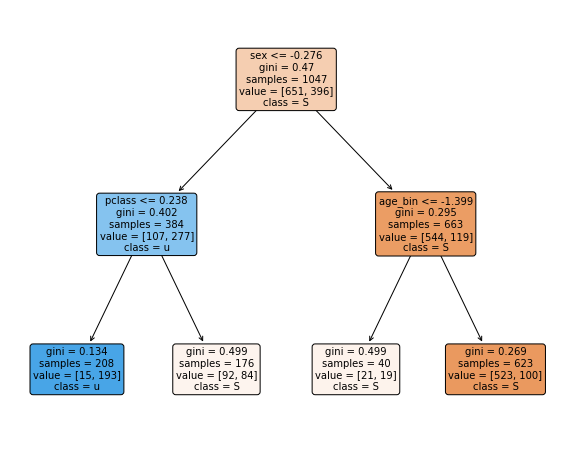

Decision Tree 예측 정확도: 0.7557251908396947


In [210]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)

dt_clf.fit(X_train, y_train)

y_hat = dt_clf.predict(X_test)

plt.figure(figsize=(10,8))
tree.plot_tree(dt_clf, filled=True,                    
              feature_names=X.columns,      
              class_names='Survived',        
              rounded=True, fontsize=10)               
plt.show()
plt.close()

dt_model = DecisionTreeClassifier()  # 객체 생성
dt_model.fit(X_train, y_train)       # 트레이닝 데이터로 학습
dt_pred = dt_model.predict(X_test)   # 검증용 데이터로 예측

accuracy = accuracy_score(y_test, dt_pred)
print('Decision Tree 예측 정확도:',accuracy)

# Random Forest

In [211]:
rf_clf=RandomForestClassifier(random_state=15)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)     
rf_pred = rf_model.predict(X_test) 

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도:', rf_accuracy)  

rf 예측 정확도: 0.7709923664122137


# Logistic Regression

In [212]:

import warnings
warnings.filterwarnings('ignore')

lr_clf=LogisticRegression(random_state=11)
lr_model = LogisticRegression()           
lr_model.fit(X_train, y_train)            
lr_pred = lr_model.predict(X_test)        

lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr 예측 정확도:', lr_accuracy)

lr 예측 정확도: 0.7557251908396947


# ANN(artificial neural network)

In [248]:
mlp_clf =MLPClassifier(random_state=10)
# MLP알고리즘의 히든레이어 노드를 10개씩 3계층으로 구성
mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(30, 30, 30), learning_rate='constant', learning_rate_init=0.001, max_iter=200, momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=None, shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False)

In [239]:
mlp.fit(X_train, y_train)
'''
다층신경망은 기본적인 활성화 함수로 relu를 사용
Relu 활성화 함수는 음수일 경우 0, 양수일 경우 선형적인 데이터를 출력
Activation: 다층신경망에서 사용하는 활성화 함수

Alpha:신경망 내의 정규화 파라미터
Batch_size:최적화를 시키기 위한 학습 최소 크기
Epsilon:수치 안정성을 위한 오차값

Learning_rate: 사용할 학습률의 형태. 기본값은 constant
Learning_rate_init:학습률. 기본값은 0.001

Max_iter:최대 반복 횟수 -> 한 200번정도면 최적화 될듯?

momentum : gradient descent update를 위한 모멘텀. 기본값은 0.9
Hidden_layer_sizes: 은닉층별 노드 수 -> (10,10,10) 3개 은닉층에 각각 10개노드씩 있음

nesterovs_momentum: nesterovs_momentum 사용 여부. solver = 'sgd' 및 momentum>0인 경우에만 사용.

power_t : 기본값은 0.5. 역 스케일링 학습 률의 지수.->역으로 진행 할때.
        learning_rate가 'invscaling'으로 설정된 경우 효과적인 학습 속도를 업데이트 하는 데 사용
solver = 'sgd'일때 만 사용.

random_state : int 또는 RandomState, 기본값은 없음. 난수 생성기의 상태 또는 시드.
Shuffle: 반복학습 때마다 데이터들의 위치를 임의적으로 변경하는지의 여부
Solver:가중치 최적화를 위해 사용하는 함수 (기본값으로는 adam이라는 함수 사용)

Validation_fraction : 모델을 만들 때 내부적으로 검증하기 위해 사용하는 데이터의 비율
Validation: training 데이터를 학습 시 데이터가 유의미한지를 검증하는 데이터
'''

"\n다층신경망은 기본적인 활성화 함수로 relu를 사용\nRelu 활성화 함수는 음수일 경우 0, 양수일 경우 선형적인 데이터를 출력\nActivation: 다층신경망에서 사용하는 활성화 함수\n\nAlpha:신경망 내의 정규화 파라미터\nBatch_size:최적화를 시키기 위한 학습 최소 크기\nEpsilon:수치 안정성을 위한 오차값\n\nLearning_rate: 사용할 학습률의 형태. 기본값은 constant\nLearning_rate_init:학습률. 기본값은 0.001\n\nMax_iter:최대 반복 횟수 -> 한 200번정도면 최적화 될듯?\n\nmomentum : gradient descent update를 위한 모멘텀. 기본값은 0.9\nHidden_layer_sizes: 은닉층별 노드 수 -> (10,10,10) 3개 은닉층에 각각 10개노드씩 있음\n\nnesterovs_momentum: nesterovs_momentum 사용 여부. solver = 'sgd' 및 momentum>0인 경우에만 사용.\n\npower_t : 기본값은 0.5. 역 스케일링 학습 률의 지수.->역으로 진행 할때.\n        learning_rate가 'invscaling'으로 설정된 경우 효과적인 학습 속도를 업데이트 하는 데 사용\nsolver = 'sgd'일때 만 사용.\n\nrandom_state : int 또는 RandomState, 기본값은 없음. 난수 생성기의 상태 또는 시드.\nShuffle: 반복학습 때마다 데이터들의 위치를 임의적으로 변경하는지의 여부\nSolver:가중치 최적화를 위해 사용하는 함수 (기본값으로는 adam이라는 함수 사용)\n\nValidation_fraction : 모델을 만들 때 내부적으로 검증하기 위해 사용하는 데이터의 비율\nValidation: training 데이터를 학습 시 데이터가 유의미한지를 검증하는 데이터\n"

In [ ]:
predictions = mlp.predict(X_test)

In [242]:
print(confusion_matrix(y_test,predictions))

[[140  18]
 [ 45  59]]


In [243]:
# precision : 정확률, recall : 재현율, f1-score, spport : x을 x로 분류,
print(classification_report(y_test,predictions))

precision    recall  f1-score   support

           0       0.76      0.89      0.82       158
           1       0.77      0.57      0.65       104

    accuracy                           0.76       262
   macro avg       0.76      0.73      0.73       262
weighted avg       0.76      0.76      0.75       262



In [257]:
parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}
# max_depth, min_samples_split, min_samples_leaf 들을 각각 [2,3,5,10], [2,3,5], [1,5,8] 씩 주고 여러번 돌려보게 한다.

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, n_jobs=-1,verbose=2, scoring='accuracy', cv=5, refit=True) 
# refit=True는 최적으로 된 하이퍼 파라미터를 반영하겠다는 의미

grid_dclf.fit(X_train, y_train) # 학습을 시킨다.

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('dt 예측 정확도 : ', accuracy)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
GridSearchCV 최고 정확도: 0.8070676691729324
dt 예측 정확도 :  0.7748091603053435
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.2s finished


In [256]:
parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}
# max_depth, min_samples_split, min_samples_leaf 들을 각각 [2,3,5,10], [2,3,5], [1,5,8] 씩 주고 여러번 돌려보게 한다.

grid_dclf = GridSearchCV(rf_clf, param_grid=parameters, n_jobs=-1,verbose=2, scoring='accuracy', cv=5, refit=True) 
# refit=True는 최적으로 된 하이퍼 파라미터를 반영하겠다는 의미

grid_dclf.fit(X_train, y_train) # 학습을 시킨다.

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('dt 예측 정확도 : ', accuracy)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    6.6s
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.792736386420597
dt 예측 정확도 :  0.7862595419847328
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    8.0s finished


In [255]:
parameters={'penalty':['l2','l1'],'C':[0.01,0.1,1,1,5,10]}
# max_depth, min_samples_split, min_samples_leaf 들을 각각 [2,3,5,10], [2,3,5], [1,5,8] 씩 주고 여러번 돌려보게 한다.

grid_dclf = GridSearchCV(lr_clf, param_grid=parameters, n_jobs=-1,verbose=2, scoring='accuracy', cv=5, refit=True) 
# refit=True는 최적으로 된 하이퍼 파라미터를 반영하겠다는 의미

grid_dclf.fit(X_train, y_train) # 학습을 시킨다.

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('dt 예측 정확도 : ', accuracy)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
GridSearchCV 최적 하이퍼 파라미터: {'C': 0.01, 'penalty': 'l2'}
GridSearchCV 최고 정확도: 0.7984643426748691
dt 예측 정확도 :  0.7633587786259542
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished


In [258]:

parameters={'alpha': [1,10,0.1],'activation': ["logistic", "relu"]}


grid_dclf = GridSearchCV(mlp_clf, param_grid=parameters, n_jobs=-1,verbose=2, scoring='accuracy', cv=5, refit=True) 
# refit=True는 최적으로 된 하이퍼 파라미터를 반영하겠다는 의미

grid_dclf.fit(X_train, y_train) # 학습을 시킨다.

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('dt 예측 정확도 : ', accuracy)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.0s finished
GridSearchCV 최적 하이퍼 파라미터: {'activation': 'relu', 'alpha': 0.1}
GridSearchCV 최고 정확도: 0.8003691045796311
dt 예측 정확도 :  0.8015267175572519
